In [1]:
import os
import pandas as pd
from pathlib import Path

current_path = Path(os.getcwd())
root = current_path.parent.absolute()
data_folder = str(root) + '\\treated_data\\'

In [2]:
os.chdir(root)
df = pd.read_excel('database.xlsx')

In [32]:
VIX = "PX_OPEN_VIX_volatility"
box_length = 7
threshold = 2.

In [41]:
for i in range(box_length):
    df["VIX_sup_" + str(i)] = (df[VIX].shift(i) > df[VIX] + threshold) # Est-ce que le i-ème jour est au dessus du threshold haut ?
    df["VIX_inf_" + str(i)] = (df[VIX].shift(i) < df[VIX] - threshold) # Est-ce que le i-ème jour est en dessous du threshold bas ?
    

# Initialisation : Est-ce que le dès le lendemain, on dépasse (1), on est en dessous (-1) ou on est dans la boite (0) ?
df["Box"] = 1*df["VIX_sup_1"] + (-1) * df["VIX_inf_1"] 


for i in range(2, box_length):
    # Iterations : Si la valeur n'est pas encore sortie (Box == 0), sort-elle par le haut (1), bas (-1) ou pas du tout (0) de la boite au jour i ?
    df["Box"] = (df["Box"] == 0) * (1 *df[f"VIX_sup_{i}"] + (-1) * df[f"VIX_inf_{i}"]) + (df["Box"] != 0) * df["Box"]

df

,Date,PX_OPEN_VIX_volatility,PX_HIGH_VIX_volatility,PX_LOW_VIX_volatility,PX_LAST_VIX_volatility,VOLUME_TOTAL_CALL_VIX_volatility,PUT_CALL_VOLUME_RATIO_CUR_DAY_VIX_volatility,VOLUME_TOTAL_PUT_VIX_volatility,TOT_OPT_VOLUME_CUR_DAY_VIX_volatility,OPEN_INT_TOTAL_CALL_VIX_volatility,...,VIX_inf_2,VIX_sup_3,VIX_inf_3,VIX_sup_4,VIX_inf_4,VIX_sup_5,VIX_inf_5,VIX_sup_6,VIX_inf_6,Box
0,2000-01-03,24.36,26.15,23.98,24.21,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1,2000-01-04,24.94,27.18,24.80,27.01,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
2,2000-01-05,27.98,29.00,25.85,26.41,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,False,-1
3,2000-01-06,26.68,26.71,24.70,25.73,NaN,NaN,NaN,NaN,NaN,...,True,False,True,False,False,False,False,False,False,-1
4,2000-01-07,25.14,25.17,21.72,21.72,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,2021-05-18,18.89,21.45,18.81,21.34,435445.0,0.8205,357293.0,792738.0,6190495.0,...,False,True,False,True,False,True,False,False,True,1
5378,2021-05-19,22.46,25.96,21.88,22.18,417537.0,1.2020,501893.0,919430.0,4725251.0,...,True,False,False,True,False,False,False,False,True,-1
5379,2021-05-20,22.33,23.50,20.19,20.67,208977.0,0.8944,186913.0,395890.0,4842985.0,...,True,False,True,False,False,True,False,False,False,-1
5380,2021-05-21,20.42,20.89,19.53,20.15,127120.0,1.3804,175475.0,302595.0,4884139.0,...,False,False,True,False,False,True,False,True,False,1


1.0674149786285076


<AxesSubplot:>

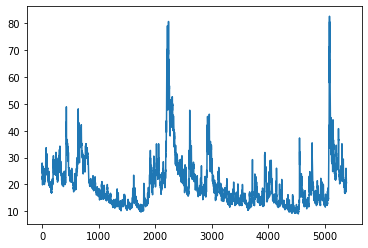

In [58]:
import matplotlib.pyplot as plt
import numpy as np
    
#plt.hist(df[VIX].diff(), bins =20)
print(np.abs(df[VIX].diff()).mean())
df[VIX].mean()

df[VIX].plot()